# Statistics from Madplanner ⚡️📊

<img width=300 src="https://i.pinimg.com/474x/6a/18/df/6a18dff64059bb388ed1046c0f2cc350.jpg">

### Importing libraries and data 📚

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.statistics as s
import json
from pymongo import MongoClient
from dotenv import load_dotenv
import os
load_dotenv()

True

In [3]:
url_mongo = os.getenv("url")
conn = MongoClient(url_mongo)
db = conn.get_database("madrid")

In [4]:
users = db.get_collection("users")

In [5]:
datitos = list(users.find({}))

In [6]:
df = pd.DataFrame.from_dict(datitos)

In [7]:
df.drop(["_id"],axis=1,inplace=True)

## First..  Cleaning data 🧽🛀🏻

In [8]:
df["day"] = df.apply(lambda row: f"{row['time'][:11]}", axis = 1)
df["hour"] = df.apply(lambda row: f"{row['time'][11:16]}", axis = 1)
df["month"] = df.apply(lambda row: int(f"{row['time'][5:7]}"), axis = 1)
df["moment"] = df.hour.apply(s.daynnite)
df["age"] = df.apply(lambda row: int(float(f"{row['age']}")), axis = 1)
df["weekday"] = df.apply(lambda row: int(f"{row['weekday']}"), axis = 1)

In [9]:
df["category"] = df.category.apply(s.catint)

In [10]:
df.dtypes

name           object
age             int64
category       object
subcategory    object
time           object
weekday         int64
gender         object
ocupation      object
children       object
residence      object
filter         object
day            object
hour           object
month           int64
moment         object
dtype: object

In [11]:
df.head()

,name,age,category,subcategory,time,weekday,gender,ocupation,children,residence,filter,day,hour,month,moment
0,Julieta,23,party,club,2021-05-19 13:17:58.579239,2,Female,Studying,NO,Madrid,NaN,2021-05-19,13:17,5,evening
1,Juli,23,party,club,2021-05-19 13:18:44.369865,2,Female,Studying,NO,Madrid,NaN,2021-05-19,13:18,5,evening
2,Galo,45,family,NaN,2021-05-19 13:27:34.093981,2,Male,Working,YES,Madrid,type,2021-05-19,13:27,5,evening
3,Galo,40,110.0,NaN,2021-05-19 13:30:35.426292,2,Male,Working,NO,Another city in Spain,price,2021-05-19,13:30,5,evening
4,Galo,40,Madrid,Salamanca,2021-05-19 13:31:03.982146,2,Male,Working,NO,Another city in Spain,location,2021-05-19,13:31,5,evening


In [12]:
df.drop(["time"],axis=1, inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df

,name,age,category,subcategory,weekday,gender,ocupation,children,residence,filter,day,hour,month,moment
0,Julieta,23,party,club,2,Female,Studying,NO,Madrid,NaN,2021-05-19,13:17,5,evening
1,Juli,23,party,club,2,Female,Studying,NO,Madrid,NaN,2021-05-19,13:18,5,evening
2,Galo,45,family,NaN,2,Male,Working,YES,Madrid,type,2021-05-19,13:27,5,evening
3,Galo,40,110.0,NaN,2,Male,Working,NO,Another city in Spain,price,2021-05-19,13:30,5,evening
4,Galo,40,Madrid,Salamanca,2,Male,Working,NO,Another city in Spain,location,2021-05-19,13:31,5,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Clara,22,20.0,NaN,2,Other,Studying,NO,Another city in Spain,price,2021-05-19,16:44,5,evening
107,Cristina,24,restaurant,gluten free,2,Female,Studying,NO,Outside of Spain,category,2021-05-19,16:48,5,evening
108,Laura,26,Other towns in Madrid,San Sebastián de los Reyes,2,Female,Working,NO,Another city in Spain,location,2021-05-19,16:49,5,evening
109,Mario,37,50.0,NaN,2,Male,Working,YES,Madrid,price,2021-05-19,16:51,5,evening


In [15]:
df.name.unique()

array(['Julieta', 'Juli', 'Galo', 'Pablito', 'Clara', 'didi', 'Manolo',
       'Charles', 'Gala', 'Manols', 'Fran', 'Daniela', 'Fram', 'Carlos',
       'Francisca', 'Pablo', 'Unai Arteaga', 'Javi', 'Jacobo', 'Frank',
       'Alejandro', 'Dario', 'Dan', 'LSDL', 'Leila', 'Camila',
       'Juli es la mejor', 'Cristina', 'Alberto Lescure', 'Jaime', 'Adri',
       'Rebrij Vivi', 'Flor ', 'Horacio', 'Matias', 'Juanpe', 'Micaela',
       'Mara', '', 'Elias', 'Manuel', 'Lile', 'ANA', 'Almudena', 'Lucia ',
       'Ana', 'Carolina', 'Laura', 'Mario', 'Manu León'], dtype=object)

## Now, let's start analysing! 🐼😉

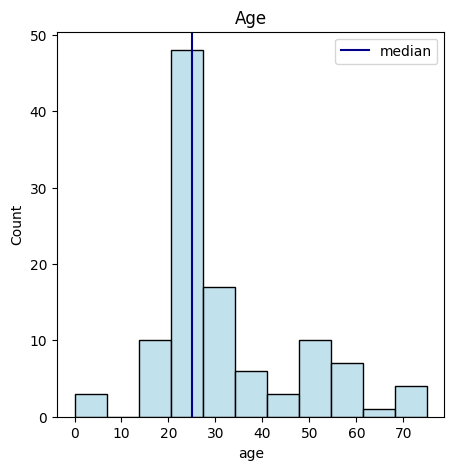

In [16]:
s.histploteo("age","Age",df).show()

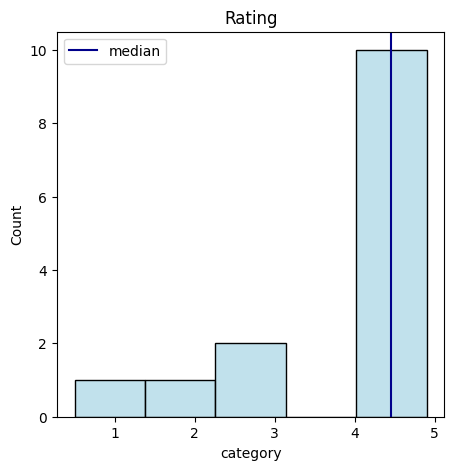

In [17]:
s.histploteo("category","Rating",df[df["filter"]=="rating"]).show()

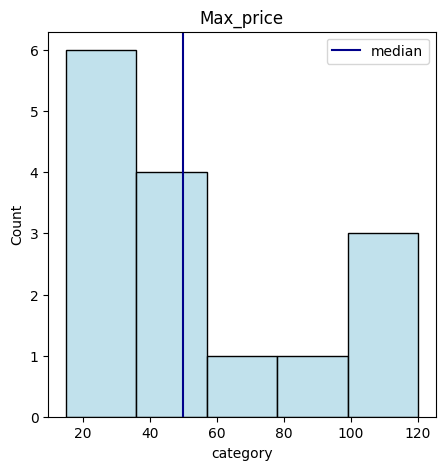

In [18]:
s.histploteo("category","Max_price",df[df["filter"]=="price"]).show()

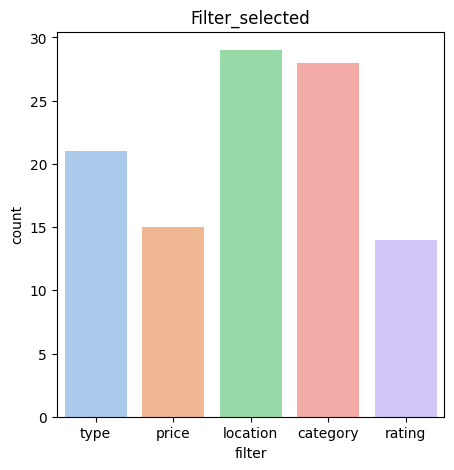

In [19]:
s.countploteo_no_hue("filter","Filter_selected",df).show()

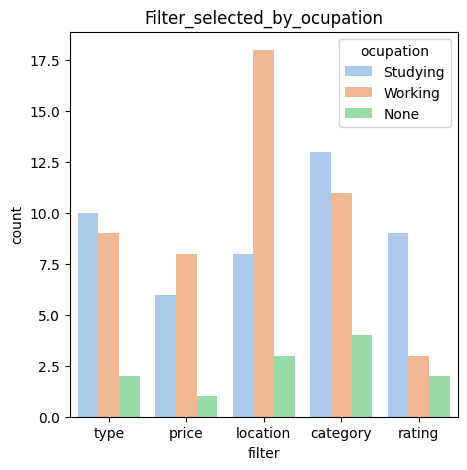

In [20]:
s.countploteo("filter","ocupation","Filter_selected_by_ocupation",df).show()

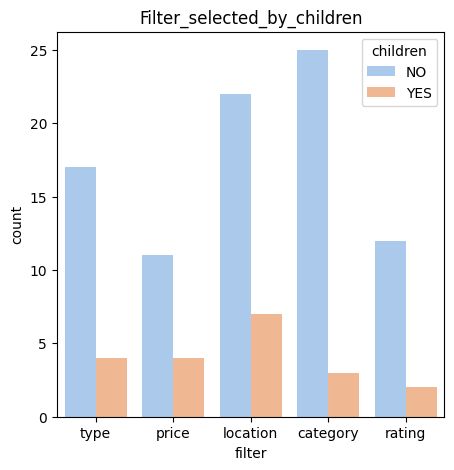

In [21]:
s.countploteo("filter","children","Filter_selected_by_children",df).show()

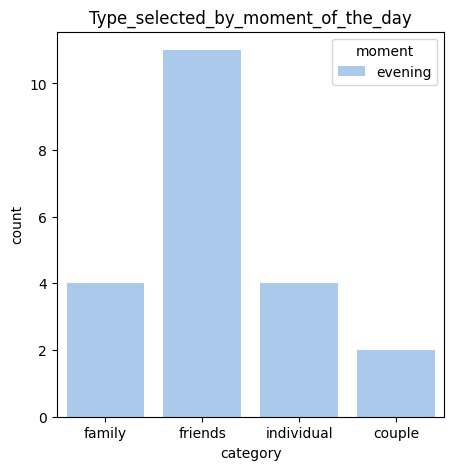

In [22]:
s.countploteo("category","moment","Type_selected_by_moment_of_the_day",df[df["filter"]=="type"]).show()

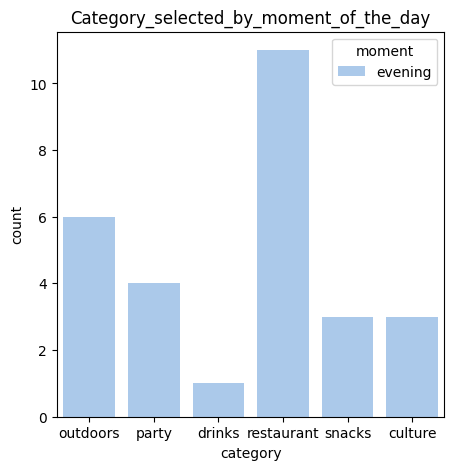

In [23]:
s.countploteo("category","moment","Category_selected_by_moment_of_the_day",df[df["filter"]=="category"]).show()

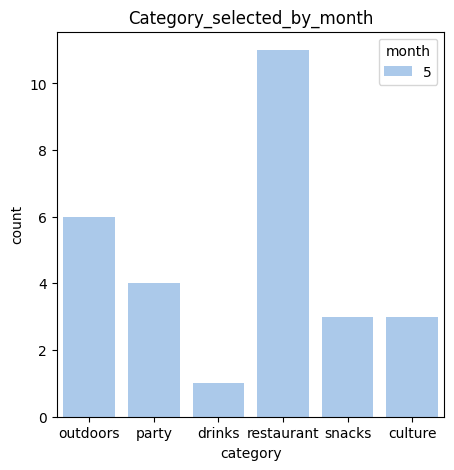

In [24]:
s.countploteo("category","month","Category_selected_by_month",df[df["filter"]=="category"]).show()

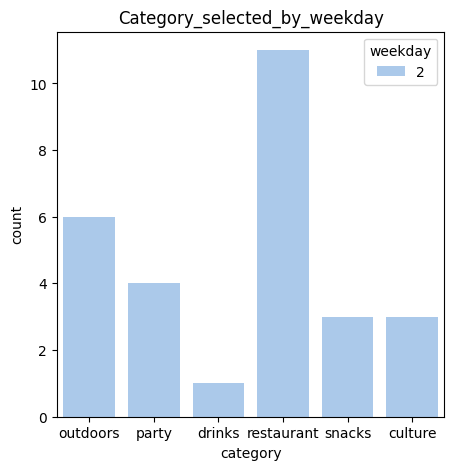

In [25]:
s.countploteo("category","weekday","Category_selected_by_weekday",df[df["filter"]=="category"]).show()

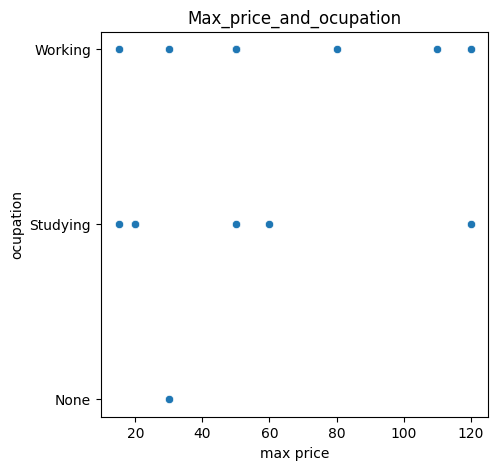

In [26]:
s.scatterploteo("category","ocupation","Max_price_and_ocupation",df[df["filter"]=="price"],"max price").show()

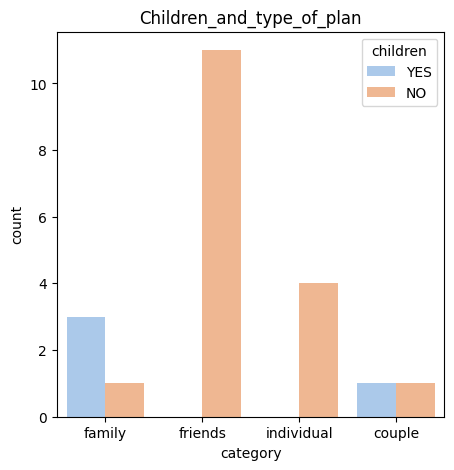

In [27]:
s.countploteo("category","children","Children_and_type_of_plan",df[df["filter"]=="type"]).show()

## Machine learning

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [29]:
df_2 = df.drop(["name","category","subcategory","day","moment"],axis=1)

In [30]:
df_2["hour"] = df.apply(lambda row: int(f"{row['hour'][0:2]}")+2, axis = 1)
df_2.hour = df_2.hour.astype(int)
df_2.month = df_2.month.astype(int)

In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 110
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        109 non-null    int64 
 1   weekday    109 non-null    int64 
 2   gender     109 non-null    object
 3   ocupation  109 non-null    object
 4   children   109 non-null    object
 5   residence  109 non-null    object
 6   filter     107 non-null    object
 7   hour       109 non-null    int64 
 8   month      109 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.6+ KB


In [32]:
df_dummy = pd.get_dummies(df_2, prefix=['filter','gender', 'ocupation', 'children','residence'], columns=['filter','gender', 'ocupation', 'children','residence'], drop_first=True)

In [33]:
df_dummy.head(2)

,age,weekday,hour,month,filter_location,filter_price,filter_rating,filter_type,gender_Male,gender_Other,ocupation_Studying,ocupation_Working,children_YES,residence_Madrid,residence_Outside of Spain
0,23,2,15,5,0,0,0,0,0,0,1,0,0,1,0
1,23,2,15,5,0,0,0,0,0,0,1,0,0,1,0


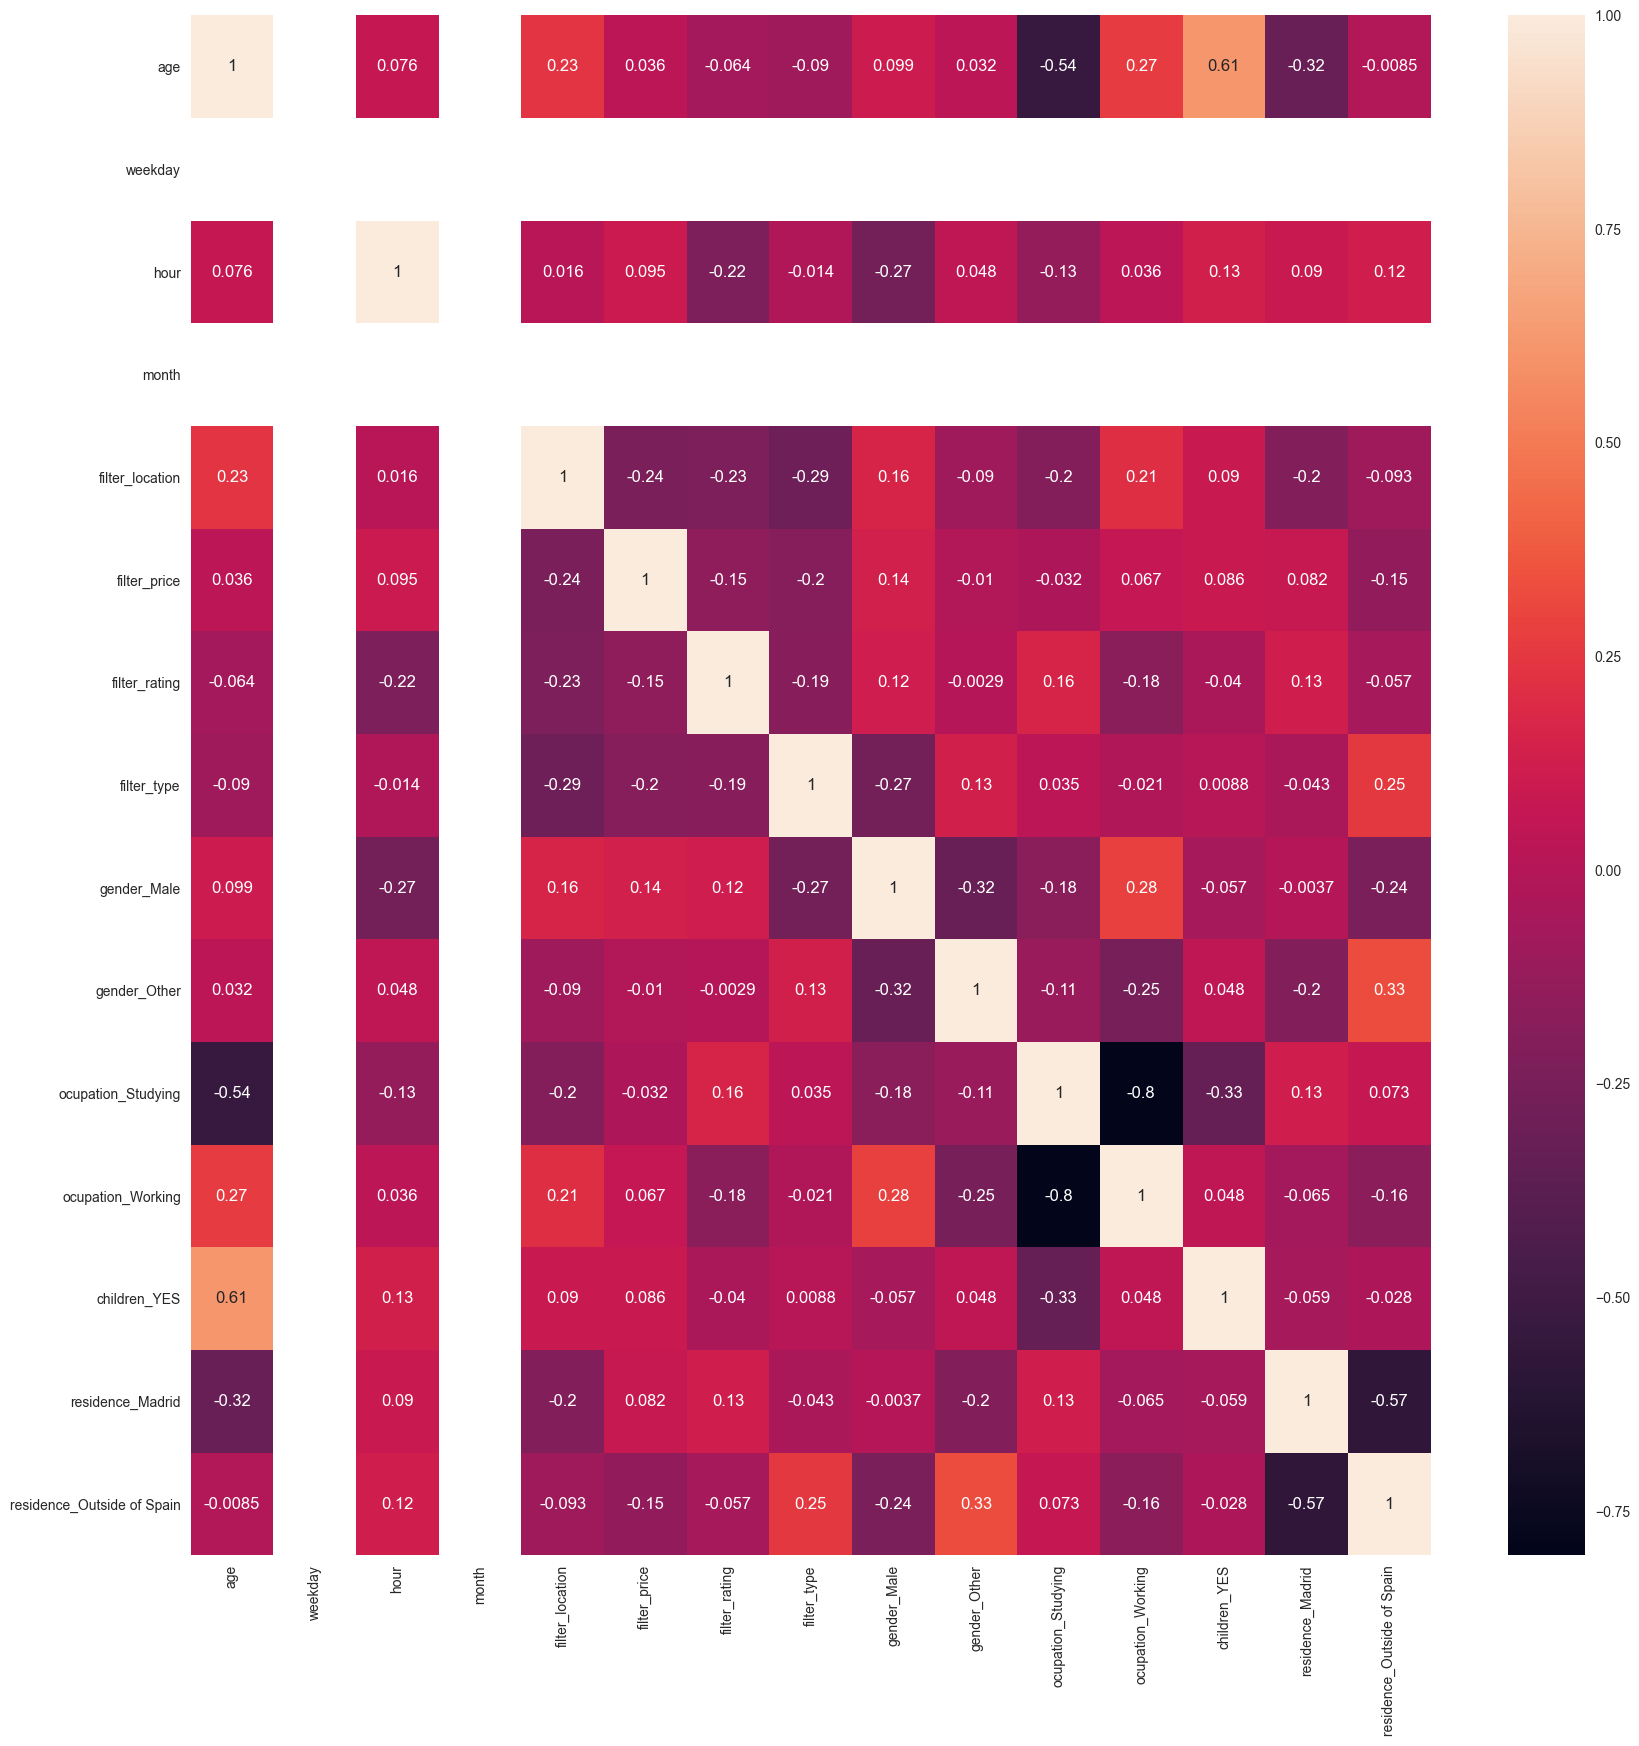

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_dummy.corr(), annot=True, ax=ax)
fig

There's no strong correlation between values, we keep all of them

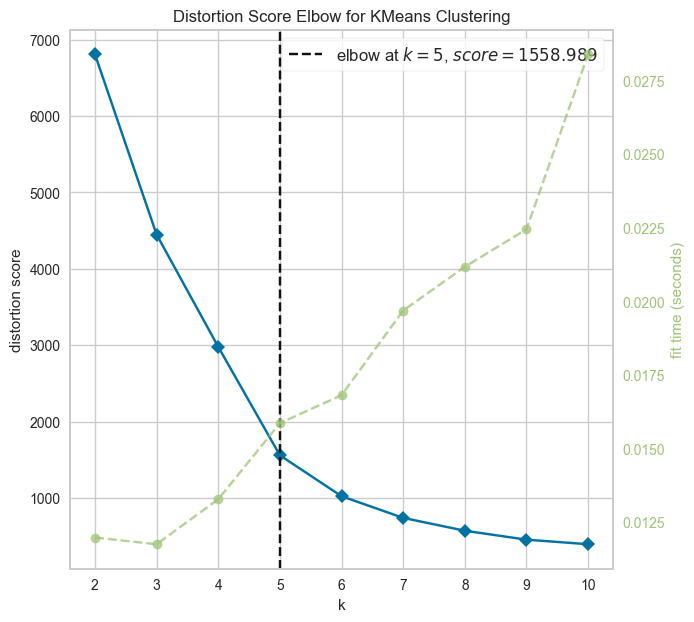

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
fig, ax = plt.subplots(figsize=(7, 7))
X = df_dummy
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show(ax=ax)

Following the elbow method, it is suggested to take 5 clusters.

In [36]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
df_dummy["cluster"] = labels
df_2["cluster"] = labels

### 1st Cluster

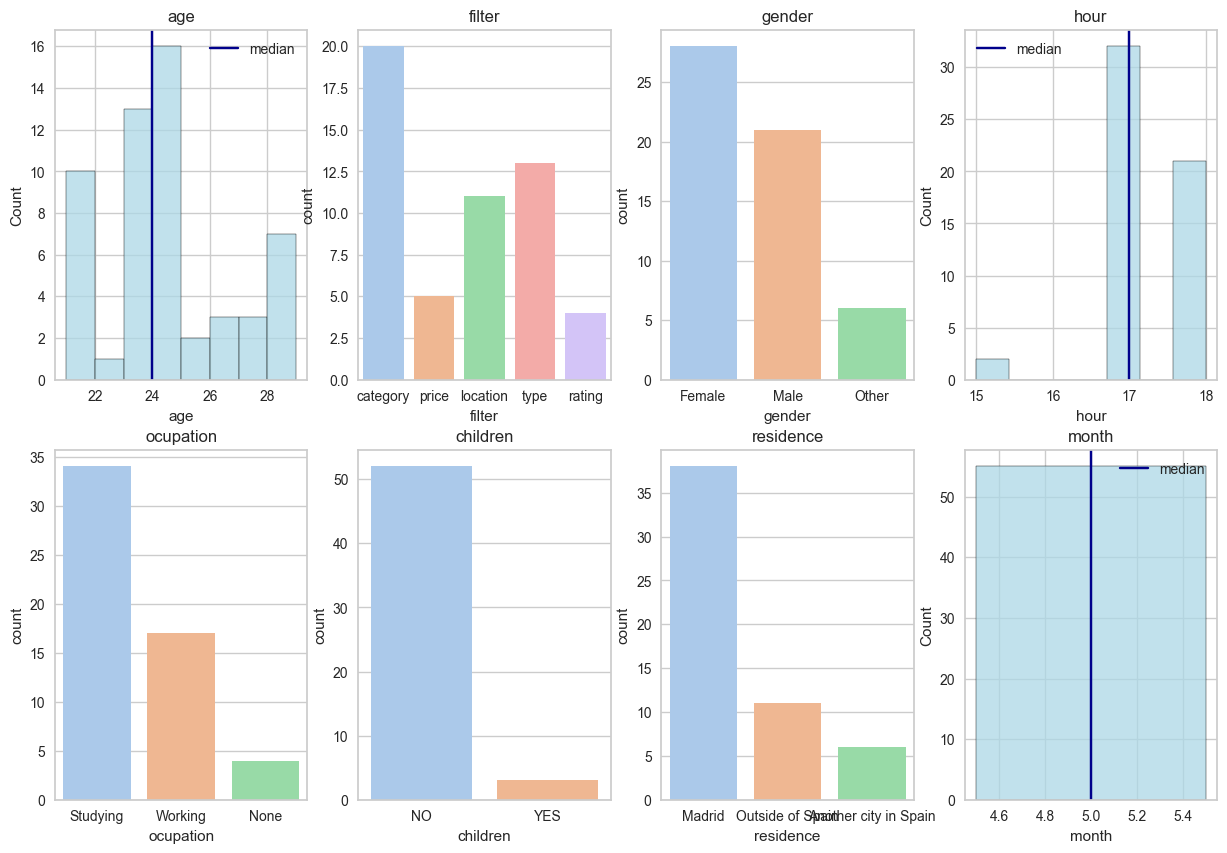

In [37]:
s.clustersplot(df_2[df_2["cluster"]==0],"Cluster_1")

### 2nd Cluster

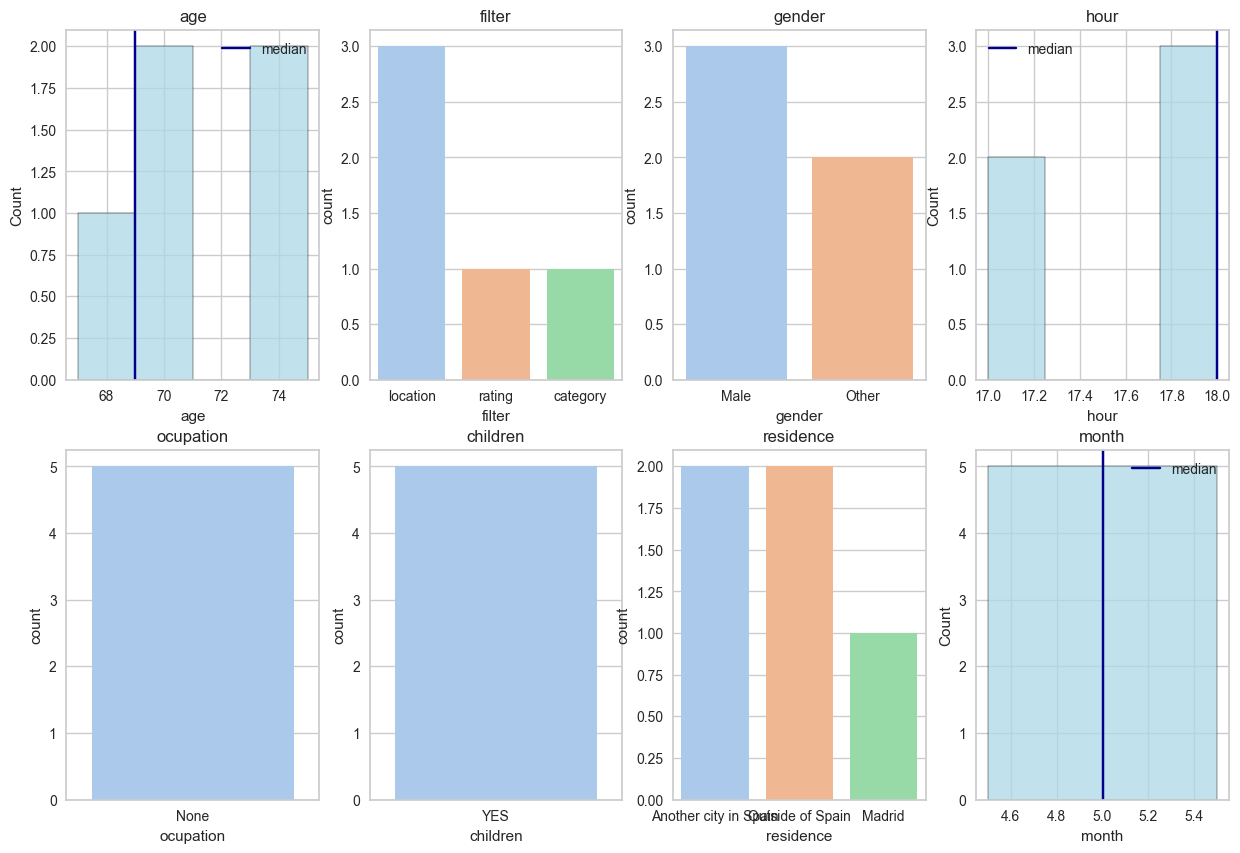

In [38]:
s.clustersplot(df_2[df_2["cluster"]==1],"Cluster_2")

### 3rd Cluster

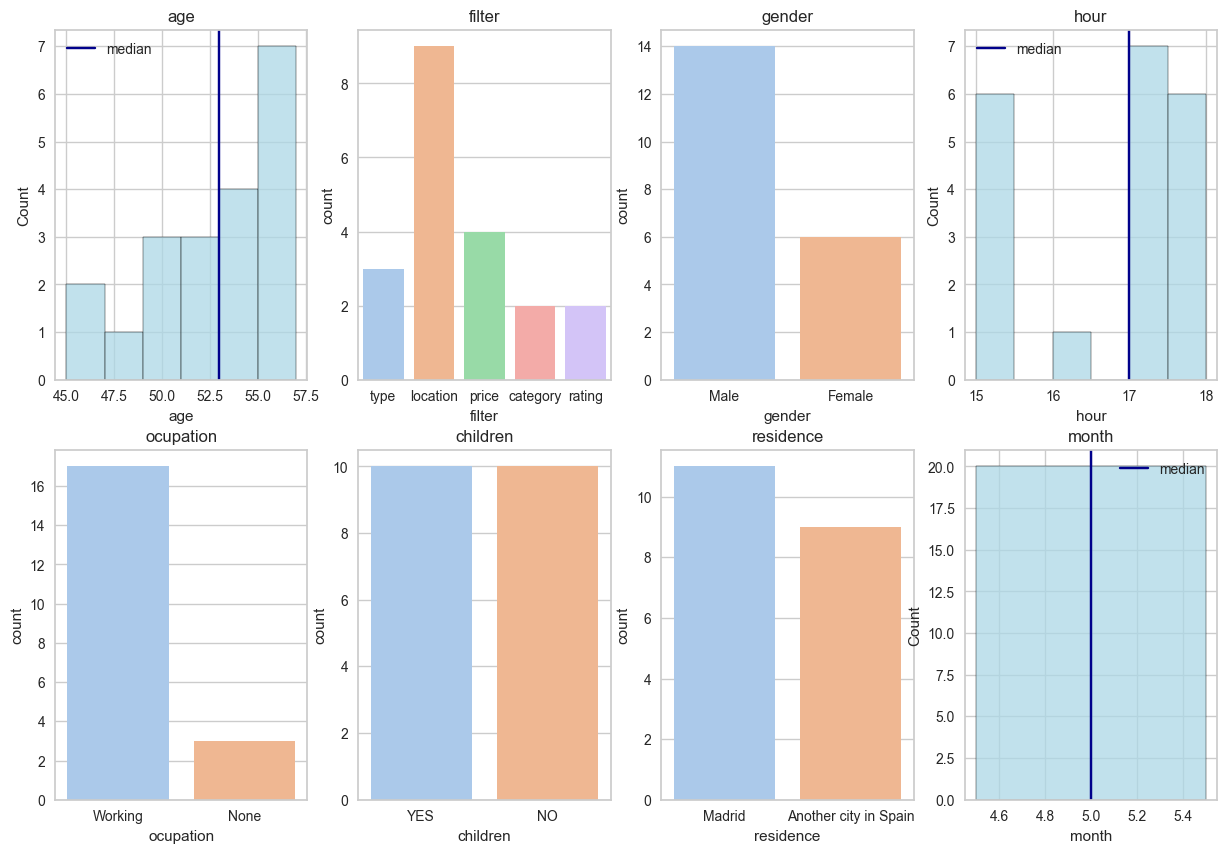

In [39]:
s.clustersplot(df_2[df_2["cluster"]==2],"Cluster_3")

### 4th Cluster

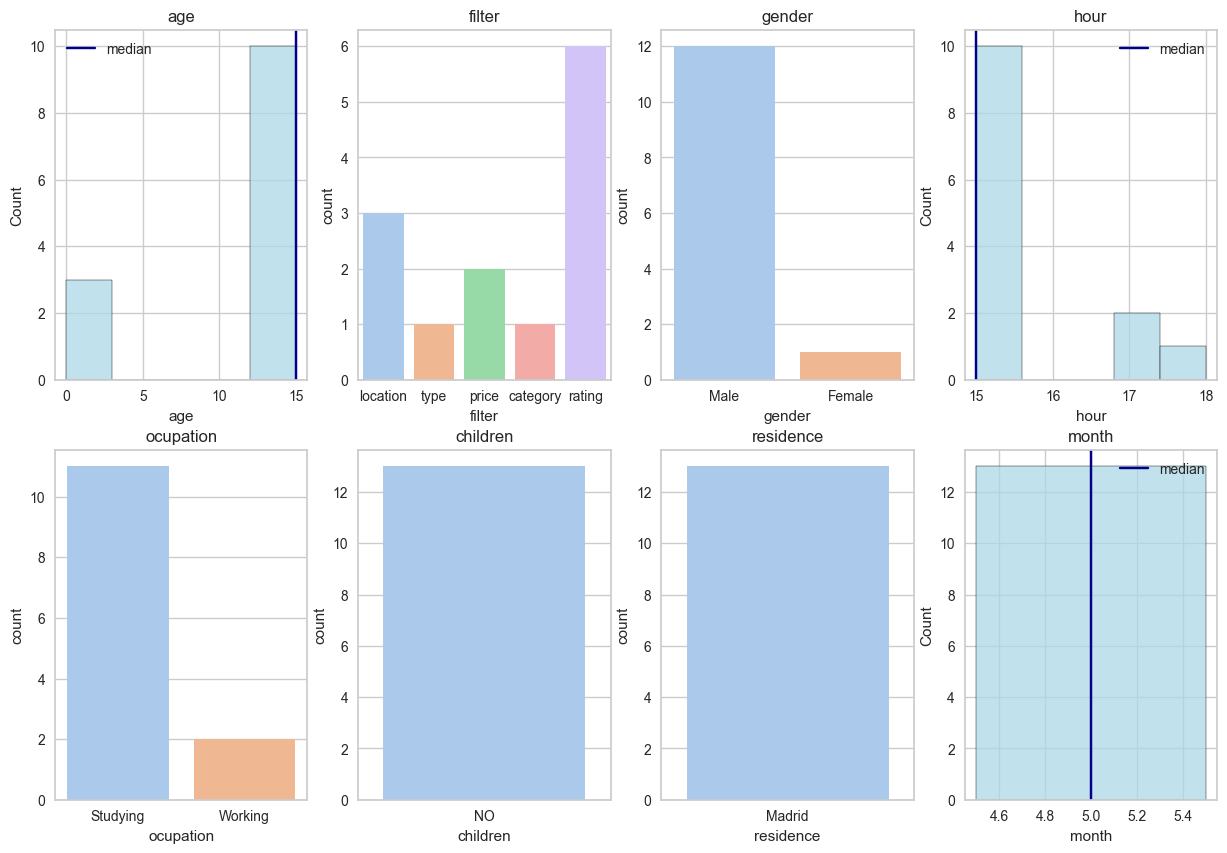

In [40]:
s.clustersplot(df_2[df_2["cluster"]==3],"Cluster_4")

### 5th Cluster

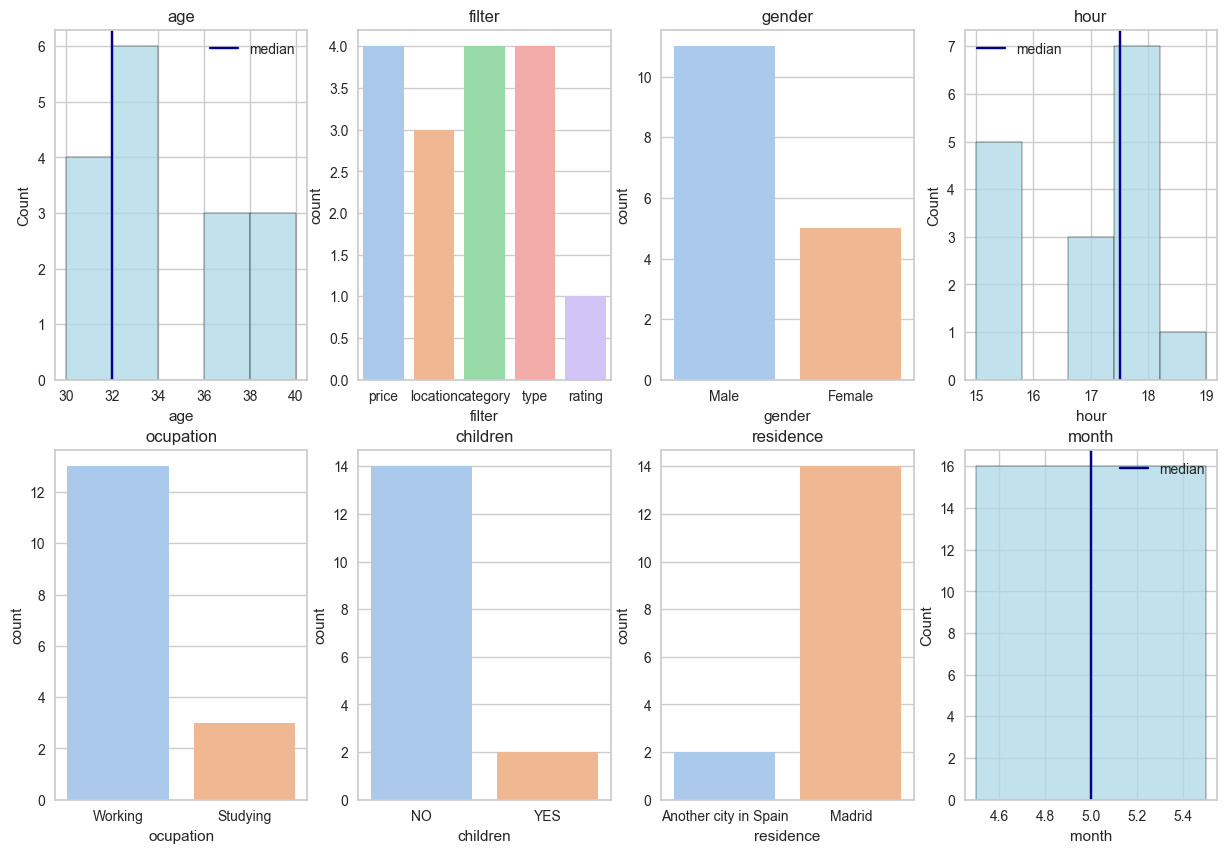

In [41]:
s.clustersplot(df_2[df_2["cluster"]==4],"Cluster_5")